In [1]:
import glob
import json
import os
import pickle
import pprint
import sys
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

module_path = os.path.abspath(os.path.join("../../.."))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.config import PATH_MODELS, PATH_REPORTS  # noqa: E402

In [2]:
corpus_name = "gambling"
corpus_kind = "reddit"

In [3]:
def get_model_information(file_path):
    with open(file_path) as f:
        model_information = json.load(fp=f)
    return model_information


def get_model_report(file_path):
    with open(file_path, "rb") as f:
        (
            classifier,
            classification_report,
            precision,
            recall,
            f1,
            accuracy,
            confusion_matrix,
            elapsed_mins,
            elapsed_secs,
        ) = pickle.load(f)
    output_dictionary = {
        "classification_report": classification_report,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "accuracy": accuracy,
        "confusion_matrix": confusion_matrix,
        "elapsed_mins": elapsed_mins,
        "elapsed_secs": elapsed_secs,
    }
    return output_dictionary

In [4]:
representations_list = [
    "bow",
    "lda",
    "lsa",
    "doc2vec",
    "padded_sequential",
    "bert_tokenizer",
]

model_identifier = 0

# Dictionary used to create the dataframe with columns, but no rows.
base_dictionary = {
    "model_identifier": [],
    "corpus_kind": [],
    "corpus_name": [],
    "representation": [],
    "representation_information": [],
    "train_file_path": [],
    "random_seed": [],
    "classifier_type": [],
    "classifier_params": [],
    "classification_report": [],
    "precision": [],
    "recall": [],
    "f1": [],
    "accuracy": [],
    "confusion_matrix": [],
    "elapsed_mins": [],
    "elapsed_secs": [],
    "total_secs": [],
    "file_name": [],
}
result_comparison = pd.DataFrame(base_dictionary)

for representation in representations_list:
    base_path = os.path.join(PATH_MODELS, corpus_kind, corpus_name, representation)
    possible_json_files = glob.glob(f"{base_path}/*_model_information.json")
    for json_file in possible_json_files:
        pkl_file = json_file[:-16] + "and_report.pkl"

        model_information = get_model_information(json_file)
        output_dictionary = get_model_report(pkl_file)
        file_name = os.path.splitext(os.path.basename(json_file))[0]

        total_secs = (
            output_dictionary["elapsed_mins"] * 60 + output_dictionary["elapsed_secs"]
        )

        df_row = {
            "model_identifier": model_identifier,
            "file_name": file_name,
            "total_secs": total_secs,
        }
        df_row.update(model_information)
        df_row.update(output_dictionary)

        result_comparison = result_comparison.append(df_row, ignore_index=True)

        model_identifier += 1

In [5]:
result_comparison

,model_identifier,corpus_kind,corpus_name,representation,representation_information,train_file_path,random_seed,classifier_type,classifier_params,classification_report,precision,recall,f1,accuracy,confusion_matrix,elapsed_mins,elapsed_secs,total_secs,file_name
0,0.0,reddit,gambling,bow,{'CountVectorizer_params': {'analyzer': 'word'...,/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,SVC,"{'C': 8, 'break_ties': False, 'cache_size': 20...",precision recall f1-score ...,0.919540,0.510490,0.476798,0.839633,"[[1460, 0], [280, 6]]",0.0,48.0,48.0,2994_model_information
1,1.0,reddit,gambling,bow,{'CountVectorizer_params': {'analyzer': 'char_...,/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,SVC,"{'C': 2, 'break_ties': False, 'cache_size': 20...",precision recall f1-score ...,0.939230,0.646853,0.694676,0.884307,"[[1460, 0], [202, 84]]",0.0,6.0,6.0,0310_model_information
2,2.0,reddit,gambling,bow,{'CountVectorizer_params': {'analyzer': 'char_...,/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,SVC,"{'C': 0.5, 'break_ties': False, 'cache_size': ...",precision recall f1-score ...,0.698323,0.552663,0.557687,0.839633,"[[1430, 30], [250, 36]]",0.0,0.0,0.0,2488_model_information
3,3.0,reddit,gambling,bow,{'CountVectorizer_params': {'analyzer': 'char_...,/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,LogisticRegression,"{'C': 2, 'class_weight': None, 'dual': False, ...",precision recall f1-score ...,0.941683,0.861996,0.895696,0.947881,"[[1445, 15], [76, 210]]",0.0,0.0,0.0,2847_model_information
4,4.0,reddit,gambling,bow,{'CountVectorizer_params': {'analyzer': 'char_...,/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,SVC,"{'C': 0.03125, 'break_ties': False, 'cache_siz...",precision recall f1-score ...,0.418099,0.500000,0.455396,0.836197,"[[1460, 0], [286, 0]]",0.0,1.0,1.0,1123_model_information
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8642,8642.0,reddit,gambling,bert_tokenizer,PreTrainedTokenizer(name_or_path='roberta-base...,/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,BERT,{'model_architecture': 'BERT( (encoder): Rob...,precision recall f1-score ...,0.864376,0.915289,0.886828,0.933562,"[[1376, 84], [32, 254]]",22.0,18.0,1338.0,15_model_information
8643,8643.0,reddit,gambling,bert_tokenizer,PreTrainedTokenizer(name_or_path='bert-base-un...,/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,BERT,{'model_architecture': 'BERT( (encoder): Ber...,precision recall f1-score ...,0.670838,0.519681,0.499589,0.836197,"[[1446, 14], [272, 14]]",24.0,52.0,1492.0,07_model_information
8644,8644.0,reddit,gambling,bert_tokenizer,PreTrainedTokenizer(name_or_path='bert-base-un...,/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,BERT,{'model_architecture': 'BERT( (encoder): Ber...,precision recall f1-score ...,0.877790,0.859472,0.868249,0.929553,"[[1407, 53], [70, 216]]",21.0,32.0,1292.0,10_model_information
8645,8645.0,reddit,gambling,bert_tokenizer,PreTrainedTokenizer(name_or_path='bert-base-un...,/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,BERT,{'model_architecture': 'BERT( (encoder): Ber...,precision recall f1-score ...,0.879304,0.714836,0.763196,0.896907,"[[1439, 21], [159, 127]]",48.0,48.0,2928.0,01_model_information


In [6]:
result_comparison.sort_values("f1", ascending=False)

,model_identifier,corpus_kind,corpus_name,representation,representation_information,train_file_path,random_seed,classifier_type,classifier_params,classification_report,precision,recall,f1,accuracy,confusion_matrix,elapsed_mins,elapsed_secs,total_secs,file_name
7889,7889.0,reddit,gambling,doc2vec,"{'dm': 0, 'vector_size': 300, 'window': 15, 's...",/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,MLPClassifier,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",precision recall f1-score ...,0.979564,0.950742,0.964444,0.981100,"[[1454, 6], [27, 259]]",0.0,0.0,0.0,1089_model_information
2891,2891.0,reddit,gambling,bow,{'CountVectorizer_params': {'analyzer': 'word'...,/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,LogisticRegression,"{'C': 128, 'class_weight': 'balanced', 'dual':...",precision recall f1-score ...,0.980687,0.947588,0.963204,0.980527,"[[1455, 5], [29, 257]]",0.0,0.0,0.0,1086_model_information
7568,7568.0,reddit,gambling,doc2vec,"{'dm': 0, 'vector_size': 300, 'window': 15, 's...",/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,MLPClassifier,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",precision recall f1-score ...,0.980687,0.947588,0.963204,0.980527,"[[1455, 5], [29, 257]]",0.0,1.0,1.0,1093_model_information
1674,1674.0,reddit,gambling,bow,{'CountVectorizer_params': {'analyzer': 'char_...,/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,SVC,"{'C': 2, 'break_ties': False, 'cache_size': 20...",precision recall f1-score ...,0.980687,0.947588,0.963204,0.980527,"[[1455, 5], [29, 257]]",1.0,6.0,66.0,0743_model_information
4745,4745.0,reddit,gambling,bow,{'CountVectorizer_params': {'analyzer': 'word'...,/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,LogisticRegression,"{'C': 512, 'class_weight': 'balanced', 'dual':...",precision recall f1-score ...,0.982213,0.946183,0.963094,0.980527,"[[1456, 4], [30, 256]]",0.0,0.0,0.0,1088_model_information
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,8240.0,reddit,gambling,doc2vec,"{'dm': 0, 'vector_size': 300, 'window': 10, 's...",/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,SVC,"{'C': 0.03125, 'break_ties': False, 'cache_siz...",precision recall f1-score ...,0.494877,0.499514,0.153180,0.172394,"[[19, 1441], [4, 282]]",0.0,5.0,5.0,0024_model_information
8045,8045.0,reddit,gambling,doc2vec,"{'dm': 0, 'vector_size': 300, 'window': 10, 's...",/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,SVC,"{'C': 0.03125, 'break_ties': False, 'cache_siz...",precision recall f1-score ...,0.472848,0.497423,0.152008,0.171249,"[[18, 1442], [5, 281]]",0.0,5.0,5.0,0014_model_information
8346,8346.0,reddit,gambling,doc2vec,"{'dm': 0, 'vector_size': 300, 'window': 5, 'se...",/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,SVC,"{'C': 0.03125, 'break_ties': False, 'cache_siz...",precision recall f1-score ...,0.467860,0.497081,0.151272,0.170676,"[[17, 1443], [5, 281]]",0.0,5.0,5.0,0456_model_information
8220,8220.0,reddit,gambling,doc2vec,"{'dm': 0, 'vector_size': 300, 'window': 15, 's...",/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,SVC,"{'C': 0.03125, 'break_ties': False, 'cache_siz...",precision recall f1-score ...,0.476381,0.498144,0.150231,0.170103,"[[15, 1445], [4, 282]]",0.0,5.0,5.0,0908_model_information


In [7]:
pprint.pprint(result_comparison.iloc[1022]["representation_information"])

{'CountVectorizer_params': {'analyzer': 'char_wb',
                            'binary': False,
                            'decode_error': 'strict',
                            'dtype': "<class 'numpy.int64'>",
                            'encoding': 'utf-8',
                            'input': 'content',
                            'lowercase': True,
                            'max_df': 0.95,
                            'max_features': None,
                            'min_df': 0.002,
                            'ngram_range': [4, 4],
                            'preprocessor': None,
                            'stop_words': None,
                            'strip_accents': None,
                            'token_pattern': '(?u)\\b\\w\\w+\\b',
                            'tokenizer': None,
                            'vocabulary': None},
 'TfidfTransformer_params': {'norm': 'l2',
                             'smooth_idf': True,
                             'sublinear_tf': False,

In [8]:
print(result_comparison.iloc[1022]["classifier_type"]), pprint.pprint(
    result_comparison.iloc[1022]["classifier_params"]
)

SVC
{'C': 0.5,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 3.0517578125e-05,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': 30,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


(None, None)

In [9]:
print(result_comparison.iloc[1022]["classification_report"])

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91      1460
         1.0       0.00      0.00      0.00       286

    accuracy                           0.84      1746
   macro avg       0.42      0.50      0.46      1746
weighted avg       0.70      0.84      0.76      1746



In [10]:
result_comparison[result_comparison["representation"] == "lda"]

,model_identifier,corpus_kind,corpus_name,representation,representation_information,train_file_path,random_seed,classifier_type,classifier_params,classification_report,precision,recall,f1,accuracy,confusion_matrix,elapsed_mins,elapsed_secs,total_secs,file_name
5304,5304.0,reddit,gambling,lda,{'number_topics': 15},/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,SVC,"{'C': 2, 'break_ties': False, 'cache_size': 20...",precision recall f1-score ...,0.953768,0.792679,0.847681,0.930699,"[[1457, 3], [118, 168]]",0.0,0.0,0.0,0310_model_information
5305,5305.0,reddit,gambling,lda,{'number_topics': 15},/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,SVC,"{'C': 32, 'break_ties': False, 'cache_size': 2...",precision recall f1-score ...,0.935474,0.954797,0.944784,0.969072,"[[1425, 35], [19, 267]]",0.0,0.0,0.0,0345_model_information
5306,5306.0,reddit,gambling,lda,{'number_topics': 25},/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,LogisticRegression,"{'C': 0.5, 'class_weight': 'balanced', 'dual':...",precision recall f1-score ...,0.915995,0.946848,0.930479,0.960481,"[[1412, 48], [21, 265]]",0.0,0.0,0.0,0857_model_information
5307,5307.0,reddit,gambling,lda,{'number_topics': 20},/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,SVC,"{'C': 2, 'break_ties': False, 'cache_size': 20...",precision recall f1-score ...,0.935887,0.951643,0.943532,0.968499,"[[1426, 34], [21, 265]]",0.0,0.0,0.0,0540_model_information
5308,5308.0,reddit,gambling,lda,{'number_topics': 15},/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,SVC,"{'C': 2, 'break_ties': False, 'cache_size': 20...",precision recall f1-score ...,0.927651,0.568182,0.581004,0.858534,"[[1460, 0], [247, 39]]",0.0,0.0,0.0,0307_model_information
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6183,6183.0,reddit,gambling,lda,{'number_topics': 10},/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,SVC,"{'C': 2, 'break_ties': False, 'cache_size': 20...",precision recall f1-score ...,0.418099,0.500000,0.455396,0.836197,"[[1460, 0], [286, 0]]",0.0,0.0,0.0,0083_model_information
6184,6184.0,reddit,gambling,lda,{'number_topics': 10},/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,SVC,"{'C': 512, 'break_ties': False, 'cache_size': ...",precision recall f1-score ...,0.953077,0.789182,0.844585,0.929553,"[[1457, 3], [120, 166]]",0.0,0.0,0.0,0169_model_information
6185,6185.0,reddit,gambling,lda,{'number_topics': 15},/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,SVC,"{'C': 512, 'break_ties': False, 'cache_size': ...",precision recall f1-score ...,0.890198,0.930537,0.908629,0.947308,"[[1395, 65], [27, 259]]",0.0,0.0,0.0,0395_model_information
6186,6186.0,reddit,gambling,lda,{'number_topics': 20},/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,SVC,"{'C': 128, 'break_ties': False, 'cache_size': ...",precision recall f1-score ...,0.950306,0.951571,0.950937,0.973081,"[[1436, 24], [23, 263]]",0.0,0.0,0.0,0600_model_information


In [11]:
result_comparison.groupby(by="representation")["f1"].max()

representation
bert_tokenizer       0.890203
bow                  0.963204
doc2vec              0.964444
lda                  0.955466
lsa                  0.960936
padded_sequential    0.855333
Name: f1, dtype: float64

In [12]:
result_comparison.f1.argmin()

8595

In [13]:
result_comparison[result_comparison.f1 == 0.11479028697571744]

,model_identifier,corpus_kind,corpus_name,representation,representation_information,train_file_path,random_seed,classifier_type,classifier_params,classification_report,precision,recall,f1,accuracy,confusion_matrix,elapsed_mins,elapsed_secs,total_secs,file_name


In [14]:
def get_positive_recall(confusion_matrix):
    tp = confusion_matrix.item((1, 1))
    fn = confusion_matrix.item((1, 0))
    div = tp + fn
    if div == 0:
        return 0.0
    else:
        return round(tp / div, 2)


def get_positive_precision(confusion_matrix):
    tp = confusion_matrix.item((1, 1))
    fp = confusion_matrix.item((0, 1))
    div = tp + fp
    if div == 0:
        return 0.0
    else:
        return round(tp / div, 2)


def get_positive_f1_score(confusion_matrix):
    tp = confusion_matrix.item((1, 1))
    fp = confusion_matrix.item((0, 1))
    fn = confusion_matrix.item((1, 0))
    div = tp + 0.5 * (fp + fn)
    if div == 0:
        return 0.0
    else:
        return round(tp / div, 2)

In [15]:
result_comparison["positive_recall"] = result_comparison.confusion_matrix.apply(
    get_positive_recall
)
result_comparison["positive_precision"] = result_comparison.confusion_matrix.apply(
    get_positive_precision
)
result_comparison["positive_f1"] = result_comparison.confusion_matrix.apply(
    get_positive_f1_score
)
result_comparison

,model_identifier,corpus_kind,corpus_name,representation,representation_information,train_file_path,random_seed,classifier_type,classifier_params,classification_report,...,f1,accuracy,confusion_matrix,elapsed_mins,elapsed_secs,total_secs,file_name,positive_recall,positive_precision,positive_f1
0,0.0,reddit,gambling,bow,{'CountVectorizer_params': {'analyzer': 'word'...,/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,SVC,"{'C': 8, 'break_ties': False, 'cache_size': 20...",precision recall f1-score ...,...,0.476798,0.839633,"[[1460, 0], [280, 6]]",0.0,48.0,48.0,2994_model_information,0.02,1.00,0.04
1,1.0,reddit,gambling,bow,{'CountVectorizer_params': {'analyzer': 'char_...,/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,SVC,"{'C': 2, 'break_ties': False, 'cache_size': 20...",precision recall f1-score ...,...,0.694676,0.884307,"[[1460, 0], [202, 84]]",0.0,6.0,6.0,0310_model_information,0.29,1.00,0.45
2,2.0,reddit,gambling,bow,{'CountVectorizer_params': {'analyzer': 'char_...,/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,SVC,"{'C': 0.5, 'break_ties': False, 'cache_size': ...",precision recall f1-score ...,...,0.557687,0.839633,"[[1430, 30], [250, 36]]",0.0,0.0,0.0,2488_model_information,0.13,0.55,0.20
3,3.0,reddit,gambling,bow,{'CountVectorizer_params': {'analyzer': 'char_...,/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,LogisticRegression,"{'C': 2, 'class_weight': None, 'dual': False, ...",precision recall f1-score ...,...,0.895696,0.947881,"[[1445, 15], [76, 210]]",0.0,0.0,0.0,2847_model_information,0.73,0.93,0.82
4,4.0,reddit,gambling,bow,{'CountVectorizer_params': {'analyzer': 'char_...,/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,SVC,"{'C': 0.03125, 'break_ties': False, 'cache_siz...",precision recall f1-score ...,...,0.455396,0.836197,"[[1460, 0], [286, 0]]",0.0,1.0,1.0,1123_model_information,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8642,8642.0,reddit,gambling,bert_tokenizer,PreTrainedTokenizer(name_or_path='roberta-base...,/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,BERT,{'model_architecture': 'BERT( (encoder): Rob...,precision recall f1-score ...,...,0.886828,0.933562,"[[1376, 84], [32, 254]]",22.0,18.0,1338.0,15_model_information,0.89,0.75,0.81
8643,8643.0,reddit,gambling,bert_tokenizer,PreTrainedTokenizer(name_or_path='bert-base-un...,/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,BERT,{'model_architecture': 'BERT( (encoder): Ber...,precision recall f1-score ...,...,0.499589,0.836197,"[[1446, 14], [272, 14]]",24.0,52.0,1492.0,07_model_information,0.05,0.50,0.09
8644,8644.0,reddit,gambling,bert_tokenizer,PreTrainedTokenizer(name_or_path='bert-base-un...,/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,BERT,{'model_architecture': 'BERT( (encoder): Ber...,precision recall f1-score ...,...,0.868249,0.929553,"[[1407, 53], [70, 216]]",21.0,32.0,1292.0,10_model_information,0.76,0.80,0.78
8645,8645.0,reddit,gambling,bert_tokenizer,PreTrainedTokenizer(name_or_path='bert-base-un...,/home/jmloyola/erisk_2022/src/models/../../dat...,30.0,BERT,{'model_architecture': 'BERT( (encoder): Ber...,precision recall f1-score ...,...,0.763196,0.896907,"[[1439, 21], [159, 127]]",48.0,48.0,2928.0,01_model_information,0.44,0.86,0.59


In [16]:
elapsed_hours = result_comparison.total_secs.sum() / 60 / 60
print(f"Time to train all the models: {elapsed_hours:.02f} hours")

Cantidad de horas de entrenamiento de todos los modelos: 94.44 horas


In [17]:
# Save the results in a pickle.
today = datetime.today().strftime("%Y_%m_%d")
report_file_name = "result_comparison_" + today + ".pkl"
base_path = os.path.join(PATH_MODELS, corpus_kind, corpus_name)
report_file_path = os.path.join(base_path, report_file_name)

result_comparison.to_pickle(path=report_file_path, protocol=4)

In [18]:
def save_best_models(measure="positive_f1"):
    best_models_idx = list(
        result_comparison.groupby(by=["representation", "classifier_type"])[
            measure
        ].idxmax()
    )
    best_models = result_comparison.iloc[best_models_idx]
    print(type(best_models))

    # Guardamos los resultados en un pickle
    today = datetime.today().strftime("%Y_%m_%d")
    file_name = f"{today}_best_models_{measure}.pkl"
    base_path = os.path.join(PATH_MODELS, corpus_kind, corpus_name)
    file_path = os.path.join(base_path, file_name)

    best_models.to_pickle(path=file_path, protocol=4)

In [19]:
interesting_measures = ["f1", "positive_f1"]
for measure in interesting_measures:
    save_best_models(measure=measure)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [20]:
def show_time_elapsed(comparison_type="representation"):
    measure = "total_secs"
    ncols = 2
    figsize = (15, 7)
    fig, ax = plt.subplots(nrows=1, ncols=ncols, sharey=False, figsize=figsize)
    axes = ax.ravel()

    groupby_result = list(result_comparison.groupby(by=comparison_type)[measure])
    data = []
    max_values = []
    labels = []

    # We separated these type of models because they had different values
    separated_groups = None
    if comparison_type == "representation":
        separated_groups = ["padded_sequential"]
    elif comparison_type == "classifier_type":
        separated_groups = ["EmbeddingLSTM"]

    for grouped_series in groupby_result:
        label = grouped_series[0]
        if label in separated_groups:
            continue
        np_series = grouped_series[1].to_numpy()
        labels.append(label)
        data.append(np_series)

    whis = [2, 98]
    axes[0].boxplot(data, whis=whis, labels=labels)
    for label in axes[0].get_xticklabels():
        label.set_rotation(45)
        label.set_ha("right")

    max_values = [serie.max() for serie in data]
    max_value = max(max_values)
    xmin, xmax = 0, 1
    axes[0].axhline(
        y=max_value,
        color="r",
        linestyle="--",
        xmin=xmin,
        xmax=xmax,
        label="maximum value",
    )
    axes[0].legend()

    data = []
    max_values = []
    labels = []
    for grouped_series in groupby_result:
        label = grouped_series[0]
        if label in separated_groups:
            np_series = grouped_series[1].to_numpy()
            labels.append(label)
            data.append(np_series)

    axes[1].boxplot(data, whis=whis, labels=labels)
    for label in axes[1].get_xticklabels():
        label.set_rotation(45)
        label.set_ha("right")

    max_values = [serie.max() for serie in data]
    max_value = max(max_values)
    axes[1].axhline(
        y=max_value,
        color="r",
        linestyle="--",
        xmin=xmin,
        xmax=xmax,
        label="maximum value",
    )
    axes[1].legend()

    fig.suptitle(
        f'{comparison_type.title()} comparison based on the measure "{measure}"'
    )

    return fig

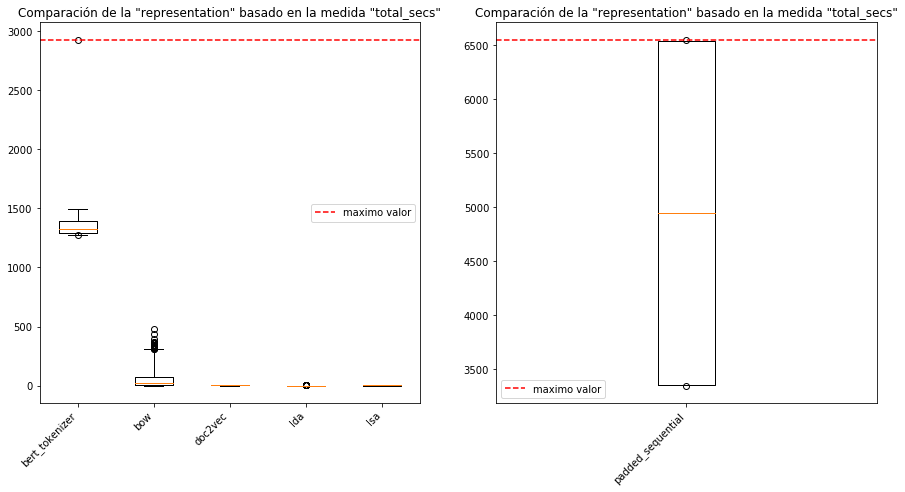

In [21]:
_ = show_time_elapsed(comparison_type="representation")

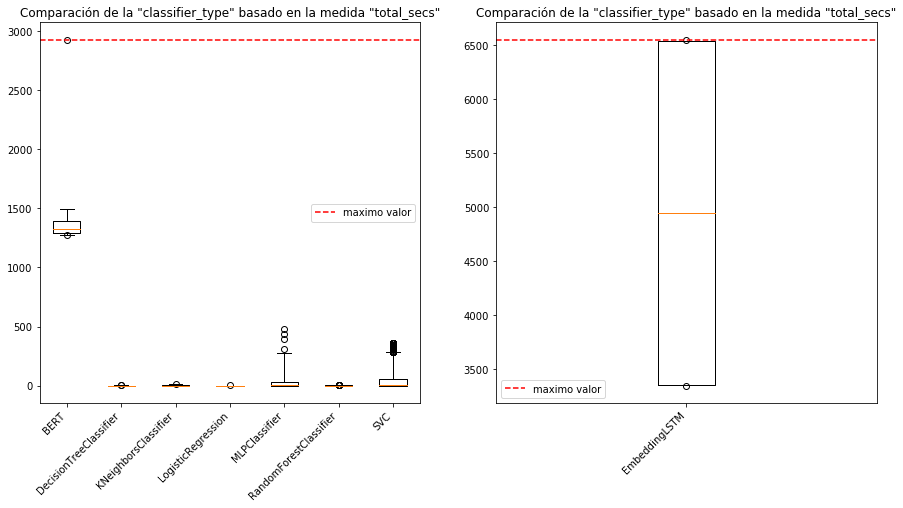

In [22]:
_ = show_time_elapsed(comparison_type="classifier_type")

In [23]:
def show_boxplot(comparison_type="representation", measure="f1"):
    double_graph = False
    if measure in ["precision", "recall", "f1"]:
        double_graph = True

    ncols = 2 if double_graph else 1
    figsize = (15, 7) if double_graph else (7, 7)
    fig, ax = plt.subplots(nrows=1, ncols=ncols, sharey=True, figsize=figsize)
    axes = ax.ravel() if double_graph else [ax]

    groupby_result = list(result_comparison.groupby(by=comparison_type)[measure])
    data = []
    max_values = []
    labels = []
    for grouped_series in groupby_result:
        label = grouped_series[0]
        np_series = grouped_series[1].to_numpy()
        labels.append(label)
        data.append(np_series)

    axes[0].set_title(
        f'{comparison_type.title()} comparison based on the measure "{measure}"'
    )
    whis = [2, 98]
    axes[0].boxplot(data, whis=whis, labels=labels)
    for label in axes[0].get_xticklabels():
        label.set_rotation(45)
        label.set_ha("right")

    max_values = [serie.max() for serie in data]
    max_value = max(max_values)
    xmin, xmax = 0, 1
    axes[0].axhline(
        y=max_value,
        color="r",
        linestyle="--",
        xmin=xmin,
        xmax=xmax,
        label="maximum value",
    )
    axes[0].legend()

    if double_graph:
        second_measure = "positive_" + measure
        groupby_result = list(
            result_comparison.groupby(by=comparison_type)[second_measure]
        )
        data = []
        max_values = []
        labels = []
        for grouped_series in groupby_result:
            label = grouped_series[0]
            np_series = grouped_series[1].to_numpy()
            labels.append(label)
            data.append(np_series)

        axes[1].set_title(
            f'{comparison_type.title()} comparison based on the measure "{second_measure}"'
        )
        axes[1].boxplot(data, whis=whis, labels=labels)
        for label in axes[1].get_xticklabels():
            label.set_rotation(45)
            label.set_ha("right")

        max_values = [serie.max() for serie in data]
        max_value = max(max_values)
        axes[1].axhline(
            y=max_value,
            color="r",
            linestyle="--",
            xmin=xmin,
            xmax=xmax,
            label="maximum value",
        )
        axes[1].legend()

    return fig

In [24]:
PATH_TO_REPORT_FIGURES = os.path.join(
    PATH_REPORTS, corpus_kind, corpus_name, "01_atemporal_classification/figures"
)
os.makedirs(PATH_TO_REPORT_FIGURES, exist_ok=True)
fig_dip = 300

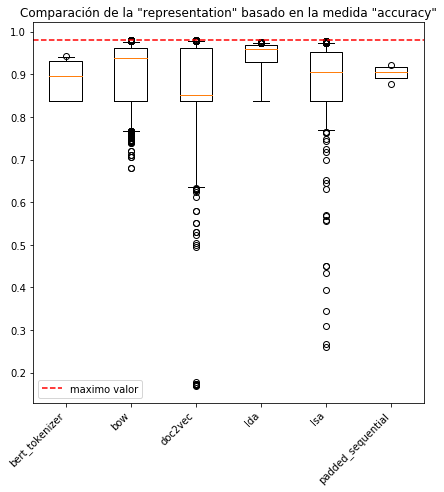

In [25]:
figure = show_boxplot(comparison_type="representation", measures="accuracy")

file_name = "01_all_experiments_accuracy_representation.png"
file_path = os.path.join(PATH_TO_REPORT_FIGURES, file_name)
figure.savefig(fname=file_path, dpi=fig_dip)

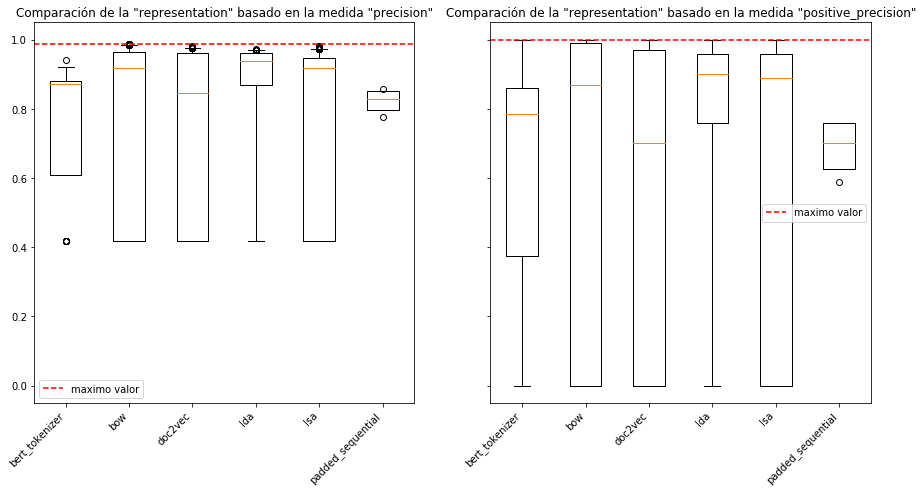

In [26]:
figure = show_boxplot(comparison_type="representation", measure="precision")

file_name = "02_all_experiments_precision_representation.png"
file_path = os.path.join(PATH_TO_REPORT_FIGURES, file_name)
figure.savefig(fname=file_path, dpi=fig_dip)

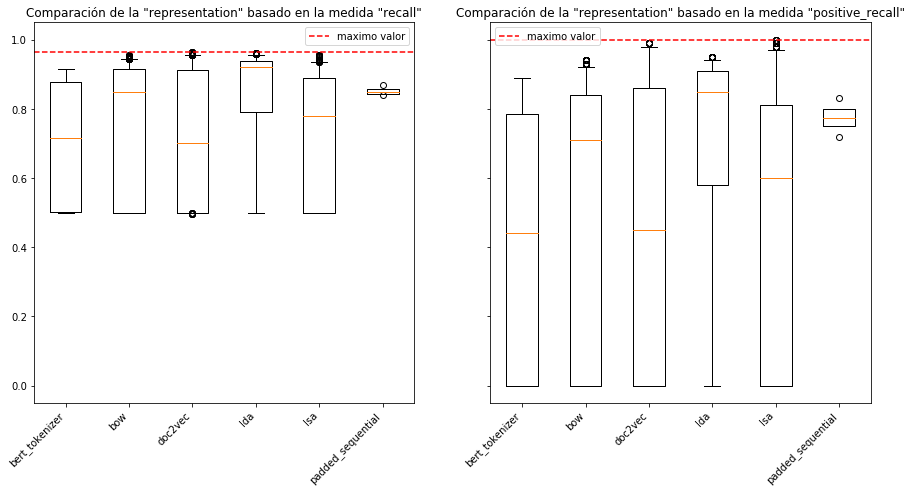

In [27]:
figure = show_boxplot(comparison_type="representation", measure="recall")

file_name = "03_all_experiments_recall_representation.png"
file_path = os.path.join(PATH_TO_REPORT_FIGURES, file_name)
figure.savefig(fname=file_path, dpi=fig_dip)

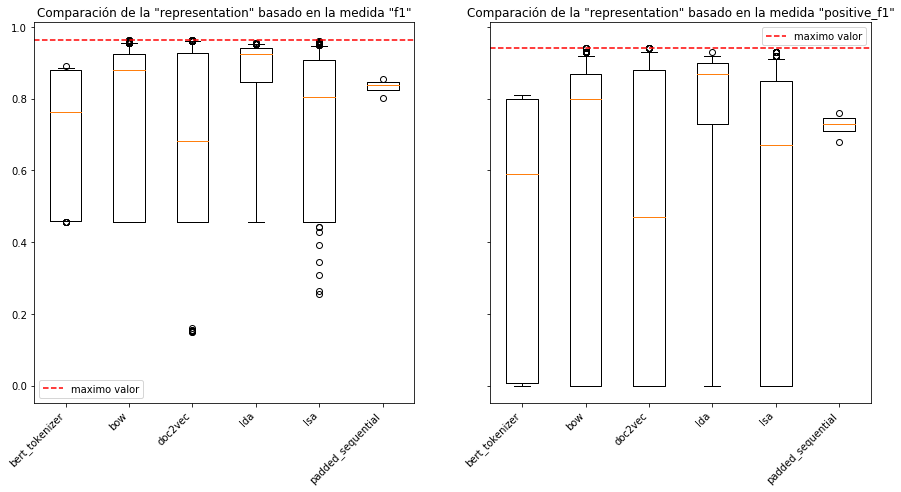

In [28]:
figure = show_boxplot(comparison_type="representation", measure="f1")

file_name = "04_all_experiments_f1_representation.png"
file_path = os.path.join(PATH_TO_REPORT_FIGURES, file_name)
figure.savefig(fname=file_path, dpi=fig_dip)

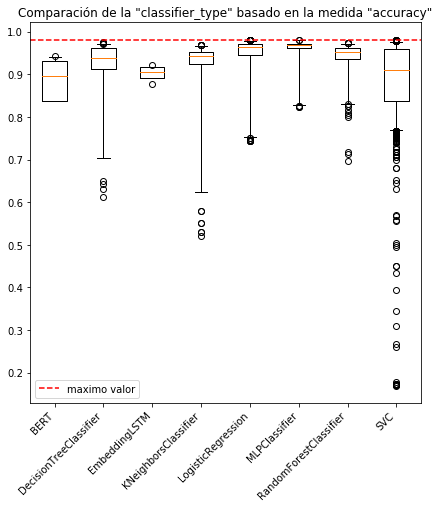

In [29]:
figure = show_boxplot(comparison_type="classifier_type", measure="accuracy")

file_name = "05_all_experiments_accuracy_classifier_type.png"
file_path = os.path.join(PATH_TO_REPORT_FIGURES, file_name)
figure.savefig(fname=file_path, dpi=fig_dip)

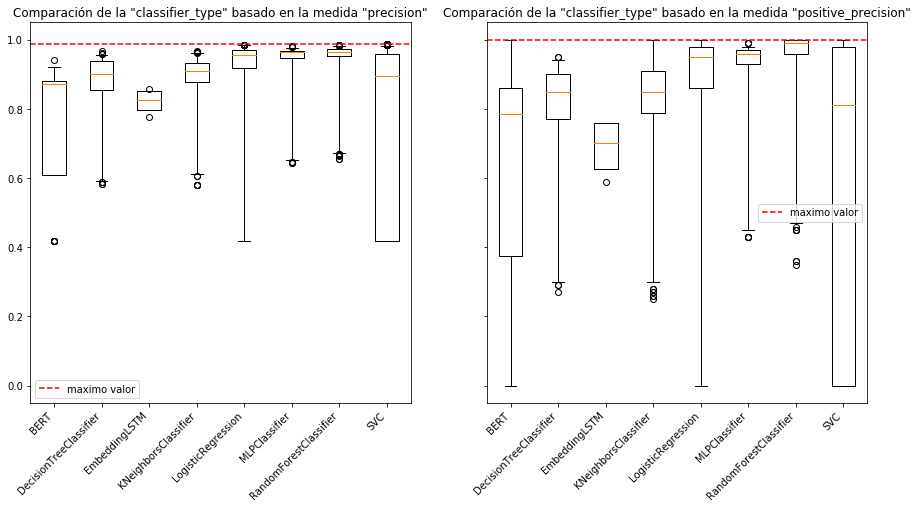

In [30]:
figure = show_boxplot(comparison_type="classifier_type", measure="precision")

file_name = "06_all_experiments_precision_classifier_type.png"
file_path = os.path.join(PATH_TO_REPORT_FIGURES, file_name)
figure.savefig(fname=file_path, dpi=fig_dip)

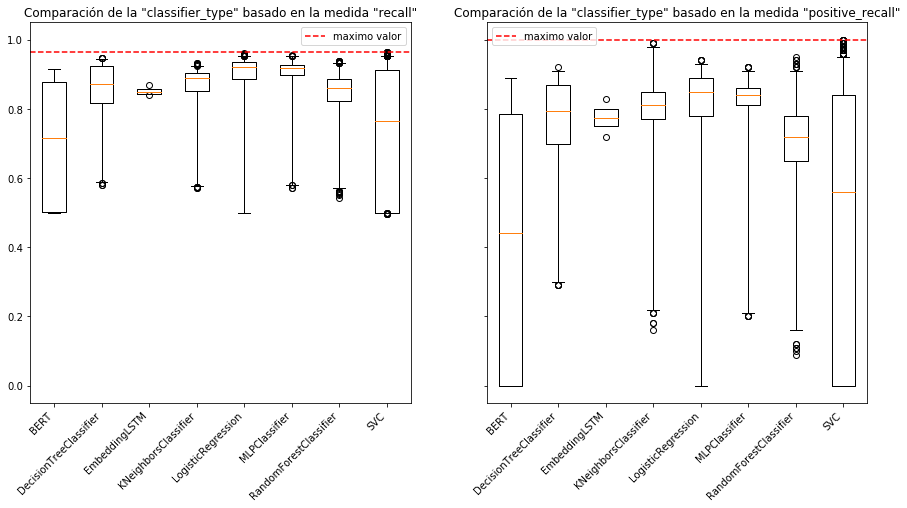

In [31]:
figure = show_boxplot(comparison_type="classifier_type", measure="recall")

file_name = "07_all_experiments_recall_classifier_type.png"
file_path = os.path.join(PATH_TO_REPORT_FIGURES, file_name)
figure.savefig(fname=file_path, dpi=fig_dip)

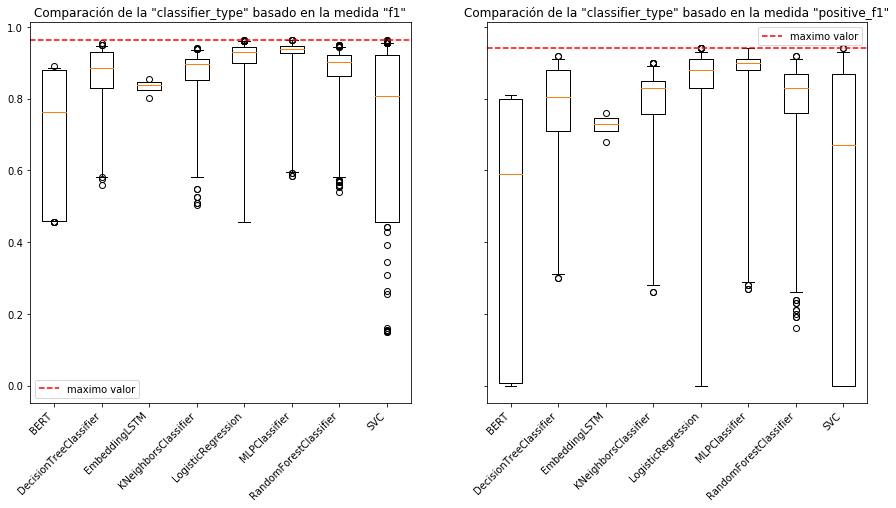

In [32]:
figure = show_boxplot(comparison_type="classifier_type", measure="f1")

file_name = "08_all_experiments_f1_classifier_type.png"
file_path = os.path.join(PATH_TO_REPORT_FIGURES, file_name)
figure.savefig(fname=file_path, dpi=fig_dip)

In [33]:
def show_matrix_max_values(measure="f1"):
    double_graph = False
    if measure in ["precision", "recall", "f1"]:
        double_graph = True

    ncols = 2 if double_graph else 1
    figsize = (15, 7) if double_graph else (7, 7)
    fig, ax = plt.subplots(nrows=1, ncols=ncols, figsize=figsize)
    axes = ax.ravel() if double_graph else [ax]

    groupby_result = list(
        result_comparison.groupby(by=["representation", "classifier_type"])[measure]
    )
    list_representation = []
    list_classifier_type = []
    list_max_value = []
    for grouped_series in groupby_result:
        representation = grouped_series[0][0]
        classifier_type = grouped_series[0][1]
        max_value = grouped_series[1].to_numpy().max()

        list_representation.append(representation)
        list_classifier_type.append(classifier_type)
        list_max_value.append(max_value)

    data = {
        "representation": list_representation,
        "classifier_type": list_classifier_type,
        "max_value": list_max_value,
    }
    df = pd.DataFrame(data=data)
    df = df.pivot("representation", "classifier_type", "max_value")
    sns.heatmap(df, ax=axes[0], annot=True, fmt=".2f", vmin=0, vmax=1, cmap="RdYlGn")

    axes[0].set_title(f'Maximum values for the measure "{measure}"')

    if double_graph:
        second_measure = "positive_" + measure
        groupby_result = list(
            result_comparison.groupby(by=["representation", "classifier_type"])[measure]
        )
        list_representation = []
        list_classifier_type = []
        list_max_value = []
        for grouped_series in groupby_result:
            representation = grouped_series[0][0]
            classifier_type = grouped_series[0][1]
            max_value = grouped_series[1].to_numpy().max()

            list_representation.append(representation)
            list_classifier_type.append(classifier_type)
            list_max_value.append(max_value)

        data = {
            "representation": list_representation,
            "classifier_type": list_classifier_type,
            "max_value": list_max_value,
        }
        df = pd.DataFrame(data=data)
        df = df.pivot("representation", "classifier_type", "max_value")
        sns.heatmap(
            df, ax=axes[1], annot=True, fmt=".2f", vmin=0, vmax=1, cmap="RdYlGn"
        )

        axes[1].set_title(f'Maximum values for the measure "{second_measure}"')

    return fig

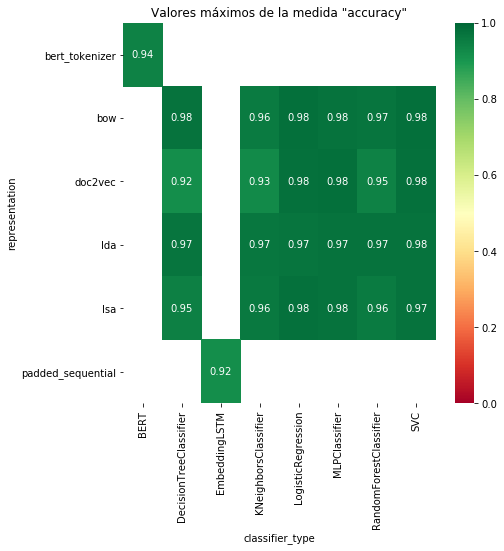

In [34]:
_ = show_matrix_max_values(measure="accuracy")

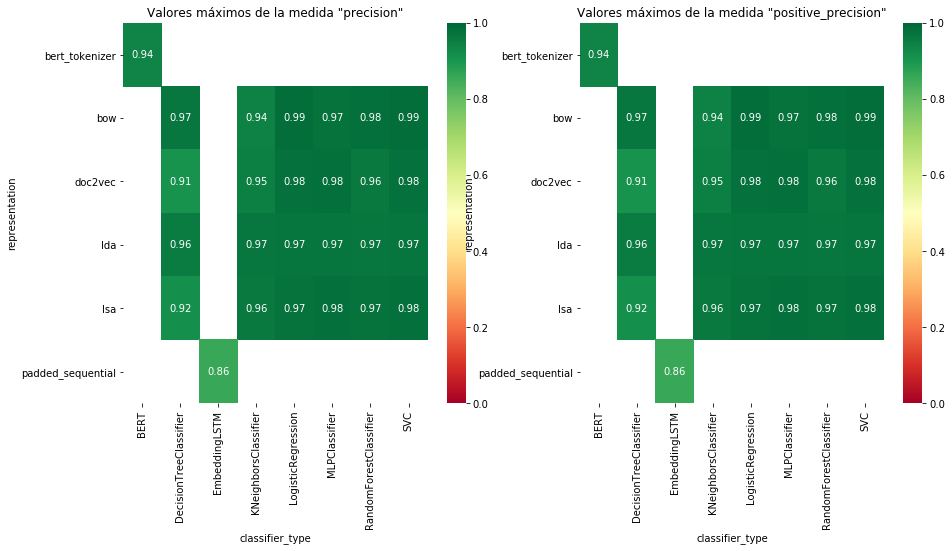

In [35]:
_ = show_matrix_max_values(measure="precision")

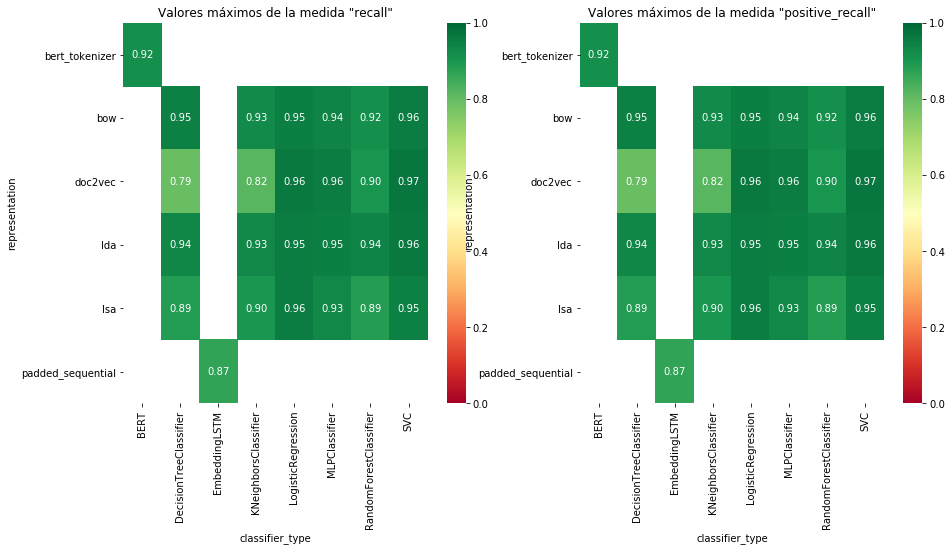

In [36]:
_ = show_matrix_max_values(measure="recall")

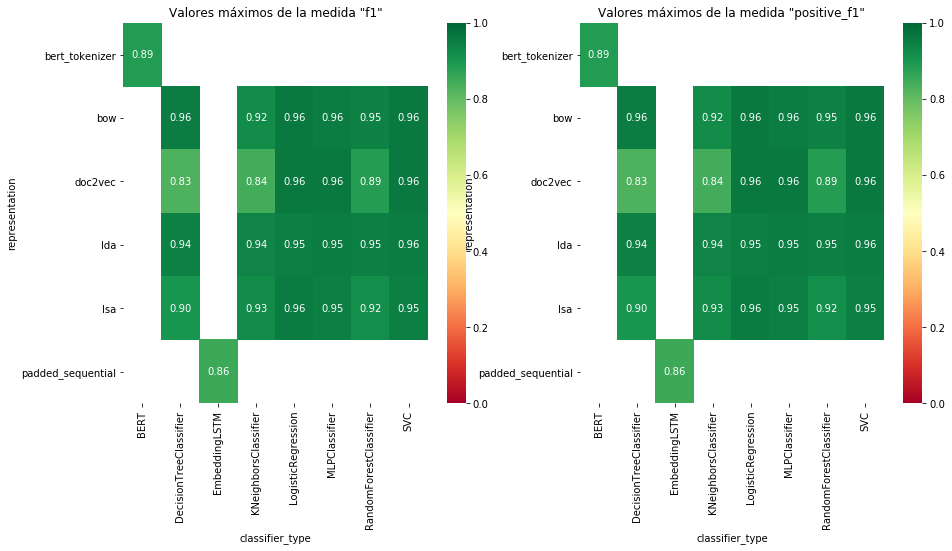

In [37]:
figure = show_matrix_max_values(measure="f1")

file_name = "09_all_experiments_f1_max_values.png"
file_path = os.path.join(PATH_TO_REPORT_FIGURES, file_name)
figure.savefig(fname=file_path, dpi=fig_dip)